Étape 1 : Importation et Exploration des Données

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
data= pd.read_excel("/Users/marthaavilas/Downloads/house_prices_dataset.xlsx")

In [4]:
data.head()

,Superficie,Chambres,AgeMaison,DistanceCentre,RevenuMoyenQuartier,PrixVente
0,121.693146,1,97,13.485115,24.469692,85.412614
1,59.045458,1,17,19.421200,27.998791,87.584667
2,69.534423,1,99,13.768497,53.435683,92.972107
3,110.922754,3,89,9.331008,23.134906,97.129427
4,64.910129,4,54,14.081498,27.336332,111.491942


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Superficie           101 non-null    float64
 1   Chambres             101 non-null    int64  
 2   AgeMaison            101 non-null    int64  
 3   DistanceCentre       101 non-null    float64
 4   RevenuMoyenQuartier  101 non-null    float64
 5   PrixVente            101 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 4.9 KB


On peut apprecier que notre set data a 101 lignes en total ainsi que 6 columns en nombres entières et en décimal. Il n'y a pas des valeur nulls.

In [7]:
data.describe().round(1)

,Superficie,Chambres,AgeMaison,DistanceCentre,RevenuMoyenQuartier,PrixVente
count,101.0,101.0,101.0,101.0,101.0,101.0
mean,263.6,2.9,47.3,9.2,63.9,74907.6
std,1202.7,1.4,29.4,5.6,22.5,750765.7
min,51.1,1.0,1.0,1.1,21.2,85.4
25%,89.2,2.0,24.0,4.5,46.9,160.4
50%,144.4,3.0,44.0,8.5,65.9,201.8
75%,196.4,4.0,69.0,13.8,84.1,246.8
max,12216.5,5.0,99.0,19.7,99.7,7545305.0


In [8]:
data.shape # lignes et colonnes totales 

(101, 6)

In [9]:
data.isnull().sum() #on utilise cette requête pour nous assurer que il n'y a pas des valeurs manquantes 

Superficie             0
Chambres               0
AgeMaison              0
DistanceCentre         0
RevenuMoyenQuartier    0
PrixVente              0
dtype: int64

Étape 2 : Détection des Outliers (Valeurs aberrantes)

* Les valeurs aberrantes sont des données qui diffèrent significativement de la majorité des autres données dans le dataset. Elles peuvent avoir un impact négatif sur les performances de certains modèles, notamment les modèles de régression.

In [12]:
#affichage des colonnes numeriques 
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("Colonnes numériques à examiner :", numerical_cols)

Colonnes numériques à examiner : Index(['Superficie', 'Chambres', 'AgeMaison', 'DistanceCentre',
       'RevenuMoyenQuartier', 'PrixVente'],
      dtype='object')


Utiliser des visualisations pour détecter les outliers

Les graphiques peuvent nous aider à repérer visuellement les outliers. Voici quelques types de graphiques utiles :

Boxplot : Montre les valeurs extrêmes sous forme de points situés en dehors de l’intervalle interquartile.

Histogramme : Permet de voir la distribution des données.

Diagramme de dispersion (scatter plot) : Montre les relations entre deux variables, avec les outliers se distinguant souvent

Interprétation de graphique pour la colonne "Superficie" :

Interprétation de l'Histogramme

Concentration des données : L'histogramme montre que la grande majorité des valeurs de "Superficie" se situent autour des petites valeurs, avec une très forte concentration près de 0.

Données étendues : Il y a une longue queue vers la droite, ce qui signifie que quelques valeurs sont beaucoup plus grandes que le reste des données, jusqu'à 12 000.

Densité : La courbe KDE confirme cette distribution asymétrique vers la droite, indiquant la présence de valeurs extrêmes.

Interprétation du Boxplot 

Outliers : La boîte à moustaches montre une concentration importante des valeurs dans la plage basse de la "Superficie". Le point éloigné sur la droite représente un outlier, une valeur de superficie qui est très élevée par rapport à la plupart des autres données.

Distribution générale : La boîte (IQR) est étroite, indiquant que la majorité des valeurs sont proches les unes des autres dans une petite gamme. Les moustaches (limites des données sans outliers) sont très courtes, ce qui confirme que la plupart des valeurs sont petites.

Valeur aberrante : Le point isolé au-delà des moustaches représente une superficie exceptionnellement élevée, qui est un potentiel outlier.

Interprétation de graphique pour la colonne "PrixVente" :

Interprétation de l'Histogramme

Distribution des données des donnéess : L'histogramme montre que presque toutes les valeurs de "PrixVente" sont concentrées autour de valeurs basses, près de zéro, avec une longue queue vers la droite. Cela indique que la plupart des ventes ont des prix relativement bas.

Valeurs extrêmes : La queue vers la droite (droite asymétrie) montre la présence de quelques valeurs très élevées, jusqu'à 7 millions. Ces valeurs extrêmes (outliers) sont rares mais significatives.

Interprétation du Boxplot (Boîte à moustaches)

Concentration des valeurs : La boîte est étroite et proche de zéro, ce qui signifie que la majorité des ventes sont dans une gamme de prix étroite et basse.

Outlier visible : Le point éloigné sur la droite représente un outlier, une vente avec un prix significativement plus élevé que la majorité des autres ventes. Cet outlier se situe autour de 7 millions, ce qui est très loin des autres valeurs, indiquant une vente atypique.

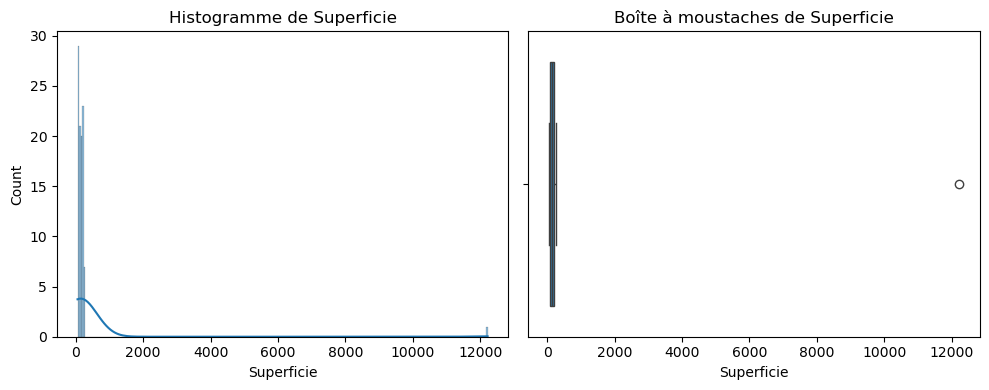

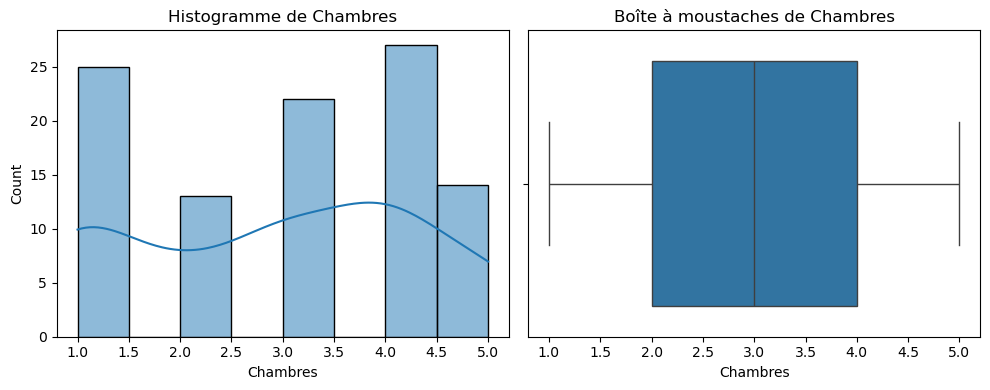

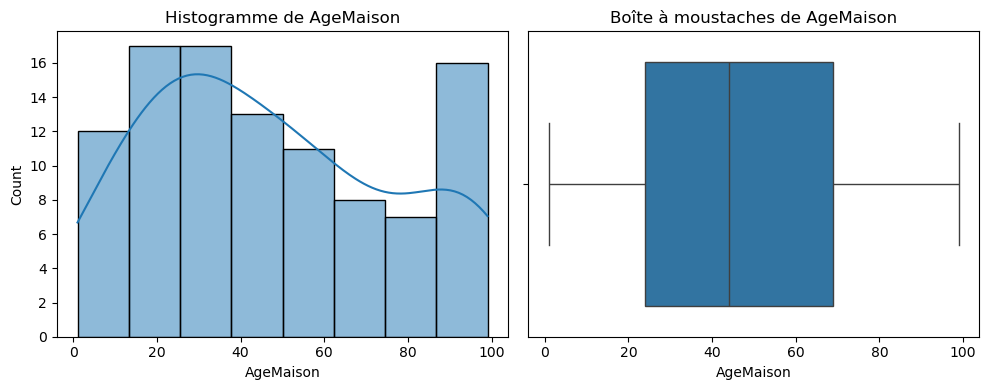

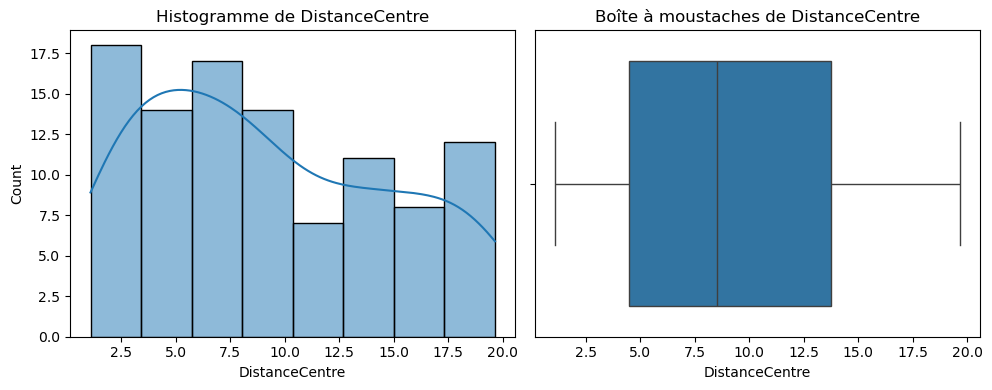

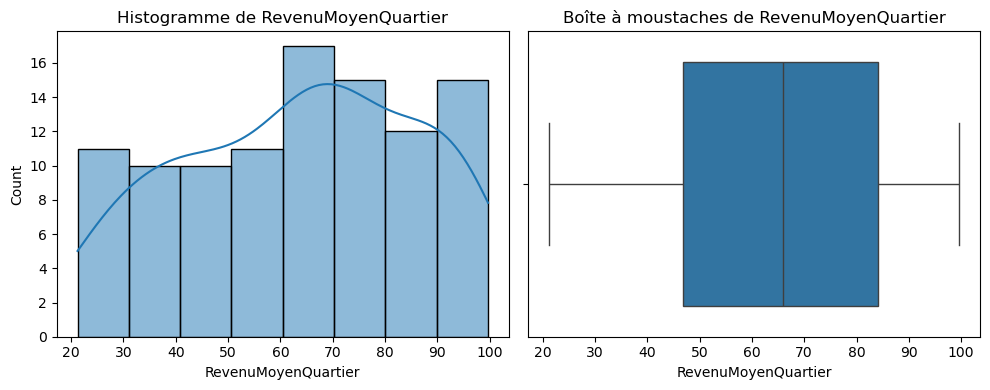

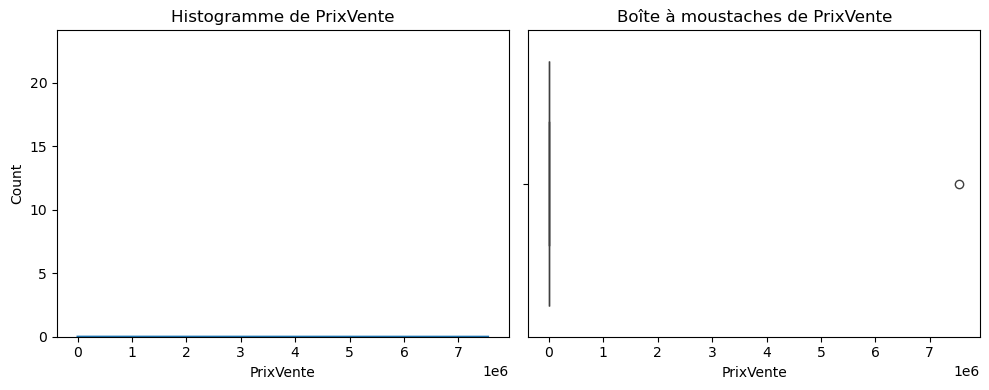

In [14]:
# Visualisation de la distribution de chaque variable quantitative
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogramme de {col}')
    
    # Boîte à moustaches pour identifier les valeurs aberrantes
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boîte à moustaches de {col}')
        
    
    plt.tight_layout()
    plt.show()


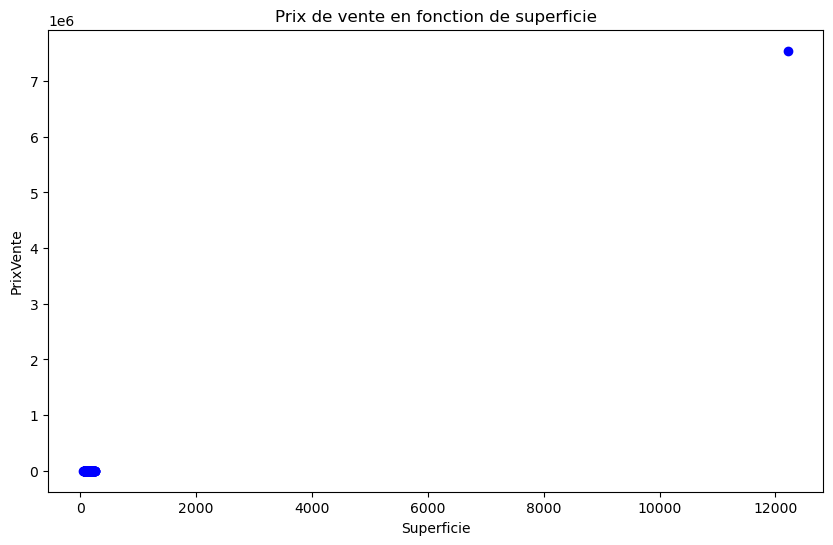

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Superficie'], data['PrixVente'],color='blue')
plt.title('Prix de vente en fonction de superficie')
plt.xlabel('Superficie')
plt.ylabel('PrixVente')
plt.show()

Interprétation du Diagramme de Dispersion

Concentration des points : La majorité des points de données se situent dans une petite gamme de superficie et de prix de vente près de zéro, ce qui indique que la plupart des propriétés ont des superficies et des prix modestes.

Valeur aberrante (outlier) : Un point isolé à la droite du graphique montre une propriété avec une très grande superficie (près de 12 000) et un prix de vente très élevé (autour de 7 millions). Ce point est un outlier, car il est éloigné des autres valeurs et pourrait influencer les analyses ou les modèles statistiques.

Identifier et supprimer les outliers

In [40]:
data.sort_values(by =['Superficie'])

,Superficie,Chambres,AgeMaison,DistanceCentre,RevenuMoyenQuartier,PrixVente
35,51.104423,3,98,5.555960,95.695563,1.825409e+02
17,54.116899,3,90,18.670320,70.912288,1.469878e+02
27,55.083825,3,46,19.033769,92.615497,1.651053e+02
11,56.877704,4,66,17.347688,66.073966,1.365983e+02
1,59.045458,1,17,19.421200,27.998791,8.758467e+01
...,...,...,...,...,...,...
48,243.126407,1,84,1.524719,47.866928,1.995585e+02
85,243.916926,4,33,19.339785,74.387582,2.671324e+02
97,243.981970,3,60,2.337906,84.075944,2.981455e+02
94,247.377387,2,8,2.105678,68.195274,2.897030e+02


Petites valeurs de superficie : Les premières lignes du tableau montrent des superficies autour de 50-60 m², ce qui semble être dans une fourchette plus basse. Ces valeurs correspondent probablement aux propriétés les plus petites du jeu de données.

Grandes valeurs de superficie : À l'autre extrême, il y a des valeurs de superficie beaucoup plus élevées, comme les lignes avec des valeurs autour de 243 m² et finalement une très grande valeur de 12 216 m² pour l'index 100. Cette dernière valeur est un outlier évident, car elle est beaucoup plus élevée que les autres valeurs de superficie, ce qui pourrait indiquer une anomalie ou une propriété très particulière dans le jeu de données.

Potentiels outliers : En analysant la distribution, on constate que les valeurs de superficie augmentent de manière graduelle jusqu'à environ 247 m². Cependant, la valeur de 12 216 m² se démarque considérablement des autres et pourrait fausser les analyses statistiques si elle est incluse sans traitement particulier.

Prix de vente (colonne PrixVente) : La colonne PrixVente montre également des variations notables, correspondant probablement à la superficie. La propriété avec 12 216 m² a un prix de vente extrêmement élevé (7 545 305), ce qui est cohérent avec la taille de la propriété.

Conclusion
Ce tri permet de repérer rapidement les valeurs aberrantes dans la colonne Superficie. La dernière ligne de cette table (superficie de 12 216 m²) est probablement un outlier.

In [46]:
data = data.drop(index=100) 
#La valeur aberrante a pour index 100, on va donc pouvoir la supprimer très facilement


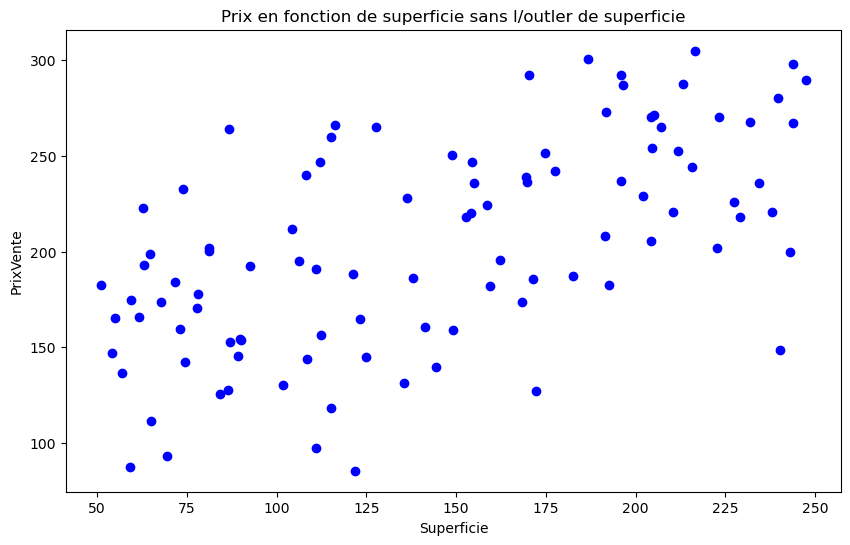

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Superficie'], data['PrixVente'],color='blue')
plt.title('Prix en fonction de superficie sans l/outler de superficie')
plt.xlabel('Superficie')
plt.ylabel('PrixVente')
plt.show()

Dans ce graphique en nuage de points, nous avons la variable Superficie en abscisse et PrixVente en ordonnée, sans l’outlier de superficie qui avait été détecté précédemment.

Interprétation

Répartition : Les points semblent être bien répartis dans le graphique, sans valeurs extrêmes qui s'écartent fortement de la majorité des autres points. Cela indique que les valeurs de superficie et de prix sont dans une plage relativement cohérente.

Valeurs aberrantes (outliers) : Sur cette visualisation, il ne semble pas y avoir de valeurs aberrantes évidentes. Les données ne présentent pas de points isolés qui seraient très éloignés des autres, ni dans les faibles valeurs de prix ni dans les valeurs élevées.

Relation entre les variables : On remarque une certaine tendance, bien que diffuse, où des superficies plus élevées sont parfois associées à des prix de vente plus élevés, mais cette corrélation n'est pas parfaitement linéaire. 

Conclusion

Après avoir retiré l'outlier en superficie, ce graphique montre des données plus homogènes. 


In [67]:
data.describe().round(1) 


,Superficie,Chambres,AgeMaison,DistanceCentre,RevenuMoyenQuartier,PrixVente
count,100.0,100.0,100.0,100.0,100.0,100.0
mean,144.0,2.9,47.8,9.3,63.8,203.6
std,59.5,1.4,29.2,5.6,22.5,54.7
min,51.1,1.0,1.0,1.1,21.2,85.4
25%,88.6,1.8,24.0,4.5,46.1,160.1
50%,142.8,3.0,45.0,8.5,65.7,201.1
75%,196.0,4.0,69.0,13.8,84.3,246.8
max,247.4,5.0,99.0,19.7,99.7,305.0


Statistiquement, on constate que la valeur aberrante a bien été supprimée

Partie 3 : Analyse et Modélisation
Calculer et visualiser la matrice de corrélation pour comprendre les relations entre les variables explicatives (indépendantes) et la variable cible (prix de vente).
Explication des corrélations observées pour identifier les variables qui influencent le plus le prix de vente.

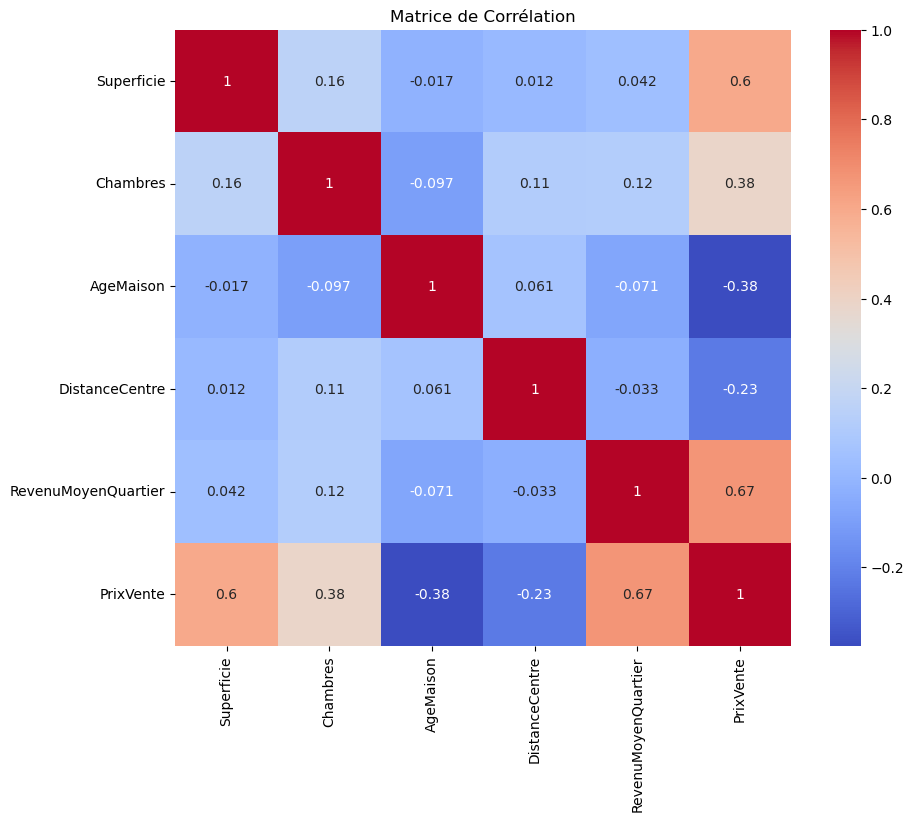

In [78]:
# Calcul de la matrice de corrélation
correlation_matrix = data.corr()

# Visualisation de la matrice de corrélation avec un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Matrice de Corrélation")
plt.show()

RevenuMoyenQuartie: Il existe une corrélation positive significative (0.67) entre le RevenueMoyenQuatier et les prixvente, ce qui est intuitif car lorsque le revenu moyen du quartir est plus élevé, les prixvent dans ce quartiers ont tendance a etre plus eleves.

Chambres: corrélation avec PrixVente : 0.38, e nombre de chambres a une corrélation positive modérée avec le prix de vente. Bien que cette corrélation soit plus faible que celle de Superficie et RevenuMoyenQuartier, elle reste significative, car le nombre de chambres est souvent un critère important pour les acheteurs et peut influencer le prix.

Superficie: corrélation avec PrixVente : 0.6, la superficie a une forte corrélation positive avec le prix de vente. Cela signifie que plus la superficie est grande, plus le prix de vente est élevé. C'est un feature pertinent, car la taille d'une propriété est généralement un facteur important qui influence son prix.



AgeMaison corrélation avec PrixVente : -0.38 pour AgeMaison a corrélation négative avec PrixVente. Une maison plus vieille pourrait avoir un prix de vente plus bas. Et aussi AgeMaison a beaucoup des correlation avex les autres features.

DistanceCentre et AgeMaison :corrélation avec PrixVente  -0.23 pour DistanceCentre et -0.38 pour AgeMaison. Ces deux variables ont une corrélation négative avec PrixVente. Une maison plus vieille ou située plus loin du centre pourrait avoir un prix de vente plus bas. Cependant, leurs corrélations sont relativement faibles en comparaison de Superficie et RevenuMoyenQuartier, donc elles sont moins influentes pour prédire le prix.

In [123]:

# Séparation des variables features (X) et de la variable target (Y)
X = data.drop('PrixVente', axis=1)  # PrixVente est notre target
Y = data['PrixVente']

#Séparation en ensemble d'entraînement et ensemble de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [125]:
# Construction du modèle
model = LinearRegression()

# Entraînement du modèle avec l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Evaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 132.0349982634083
R²: 0.9536189585546315


Performance du Modèle

Mean Squared Error (MSE) : 132.03

Le MSE mesure la moyenne des carrés des erreurs entre les valeurs réelles de PrixVente et les valeurs prédites par le modèle. Une valeur plus basse du MSE indique une meilleure précision du modèle. Dans ce cas, un MSE de 132.03 signifie que l'erreur moyenne est assez faible, ce qui montre que le modèle prédit relativement bien les valeurs de PrixVente.


R² (R-squared) : 0.95

Le R², ou coefficient de détermination, indique la proportion de la variance de la variable cible (PrixVente) expliquée par les variables explicatives.

Une valeur de R² de 0.95 signifie que 95% de la variance de PrixVente est expliquée par le modèle, ce qui est excellent. Cela signifie que les variables explicatives choisies capturent presque toutes les variations du prix de vente.



Coefficients du modèle

In [138]:
# Affichage de l'intercept du modèle # c-à-d la constante du modèle (= la valeur des prixvente lorsque les features sont égales à 0)
print(f'Intercept: {model.intercept_}')

# Affichage des coefficients pour chaque variable indépendante
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Intercept: 61.23163563670002
                     Coefficient
Superficie              0.498266
Chambres                8.971358
AgeMaison              -0.561421
DistanceCentre         -2.105538
RevenuMoyenQuartier     1.417525



Interprétation des Coefficients et Impact des Variables Explicatives
Les coefficients des variables explicatives indiquent l'effet de chaque variable indépendante sur la variable cible (le PrixVente), tout en gardant les autres variables constantes.

Superficie (Coefficient : 0.498)

Impact : Ce coefficient indique que pour chaque unité de superficie supplémentaire, le PrixVente augmente de 0,498 unités, toutes choses étant égales par ailleurs. L'effet est positif, ce qui est logique puisque des maisons plus grandes sont généralement plus chères.

Importance : Bien que positif, ce coefficient est relativement modéré par rapport à d'autres variables comme le nombre de chambres, ce qui suggère que la superficie contribue au prix, mais n'est pas le facteur le plus déterminant dans ce modèle.

Chambres (Coefficient : 8.971)

Impact : Chaque chambre supplémentaire augmente le PrixVente de 8,971 unités, ce qui en fait une variable ayant un impact plus fort sur le prix de vente. Cela signifie que le nombre de chambres est un critère important pour les acheteurs, qui perçoivent probablement plus de valeur dans des maisons avec plus de chambres.

Importance : Le coefficient est significatif, ce qui montre que cette variable est très influente dans la détermination du prix de vente. C’est probablement en raison de l'utilité accrue et de la perception de confort qu'offre un plus grand nombre de chambres.

AgeMaison (Coefficient : -0.561)

Impact : Le coefficient est négatif, ce qui signifie que chaque année d'ancienneté de la maison réduit le PrixVente de 0,561 unités. Cela peut s'expliquer par la dépréciation des bâtiments au fil du temps et la préférence des acheteurs pour des maisons plus récentes, qui nécessitent potentiellement moins de rénovations.

Importance : Bien que le coefficient soit négatif, son impact est plus faible que celui des autres variables comme Chambres ou RevenuMoyenQuartier.

DistanceCentre (Coefficient : -2.106)

Impact : Ce coefficient indique qu'une augmentation de la distance par rapport au centre entraîne une diminution de 2,106 unités dans le PrixVente. Cela peut refléter la préférence des acheteurs pour des biens immobiliers proches des centres urbains, souvent perçus comme plus accessibles et plus attractifs.

Importance : La distance a un impact négatif, mais il reste modéré par rapport à des variables comme Chambres. Cependant, cet effet pourrait être plus ou moins prononcé en fonction de la zone géographique et des préférences locales.

RevenuMoyenQuartier (Coefficient : 1.418)

Impact : Pour chaque unité d'augmentation du revenu moyen dans le quartier, le PrixVente augmente de 1,418 unités. Cela s'explique par la corrélation entre des quartiers plus riches et la demande pour des maisons de valeur plus élevée, reflétant le prestige et la sécurité perçus.

Importance : Ce coefficient est important, montrant que le quartier influe directement sur la valeur d'une maison. Les acheteurs sont prêts à payer plus pour des maisons situées dans des quartiers à haut revenu.

Variables avec le Plus Grand Impact

Les deux variables ayant le plus grand impact positif sur le PrixVente sont :

Chambres : Avec un coefficient de 8,971, le nombre de chambres a un effet majeur sur le prix de vente, ce qui s’explique par la demande pour des espaces plus grands et la perception de valeur ajoutée qu’offre une maison avec plus de chambres.

RevenuMoyenQuartier : Avec un coefficient de 1,418, cette variable montre que les maisons situées dans des quartiers à revenu plus élevé sont perçues comme plus précieuses.
En résumé, le nombre de chambres et le revenu moyen du quartier influencent le plus le prix de vente, car ils répondent aux attentes des acheteurs en matière d'espace et de statut.

Intercept (Ordonnée à l'Origine)

L'intercept du modèle est de 61,23. Ce chiffre représente la valeur de PrixVente lorsque toutes les variables explicatives (Superficie, Chambres, AgeMaison, DistanceCentre, RevenuMoyenQuartier) sont à zéro.

Interprétation Économique/Business de l'Intercept

Dans un contexte économique ou business, cet intercept peut être interprété comme une valeur de base ou un prix minimum théorique pour une maison, indépendamment des autres facteurs. Cela pourrait refléter le coût intrinsèque de base associé à la possession d'une propriété, comme la valeur du terrain, les infrastructures minimales ou autres facteurs de base. Toutefois, il est important de noter que dans la réalité, une maison avec toutes ces valeurs à zéro est irréaliste (par exemple, une superficie de zéro n’est pas possible).

Application du modèle pour estimer la valeur de 2 biens

1 Première prédiction avec les valeurs suivantes : 120m², 3 chambres, âge de la maison = 20ans, situé à 10km du centre et revenu moyen 50k€

In [149]:
prix_pred = [[120, 3, 20, 10, 50]]

# Prédire la valeur dépendante en fonction des valeurs fournies
prediction = model.predict(prix_pred)

print("Prédiction du prix de vente :", prediction[0])

Prédiction du prix de vente : 186.53007039403758


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2 Deuxième prédiction avec les valeurs suivantes : 120m², 4 chambres, âge de la maison = 20ans, situé à 10km du centre et revenu moyen 50k€

In [154]:
prix_pred2 = [[120, 4, 20, 10, 50]]

# Prédire la valeur dépendante en fonction des valeurs fournies
prediction = model.predict(prix_pred2)

print("Prédiction du prix de vente :", prediction[0])

Prédiction du prix de vente : 195.50142794572284


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Interprétation de la différence de prix

La différence entre ces deux prédictions est le nombre de chambres, qui passe de 3 à 4. Cela signifie que l'augmentation du prix estimé est uniquement due à l’ajout d’une chambre supplémentaire, les autres caractéristiques étant identiques.

Différence de prix entre les deux biens :

Prix de la deuxième maison (4 chambres) : 195,50k€
Prix de la première maison (3 chambres) : 186,53k€
Différence : 195,50k€ - 186,53k€ = 8,97k€

Interprétation basée sur le coefficient du modèle :

Selon le modèle, le coefficient pour le nombre de chambres est de 8,97k.
Cela signifie qu'ajouter une chambre à une maison entraîne une augmentation de 8,97k€ dans le prix estimé, toutes choses égales par ailleurs.